# Task 1 - Prediction using Supervised ML

## Submitted By: Nilesh Joshi

### To predict the percentage of marks that a student is likely to score based on the number of study hours.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#url for dataset = http://bit.ly/w-data
filename = "student_marks.csv"
s_data = pd.read_csv(filename)
print("Data read successfully!")
s_data.head(10)

Data read successfully!


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Now, we'll plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot like this:

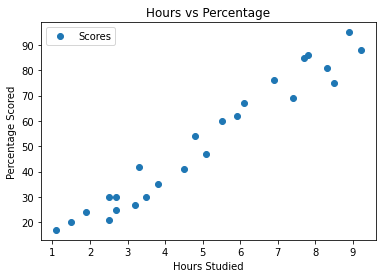

In [4]:
s_data.plot(x="Hours", y="Scores", style='o')
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scored")
plt.show()

#### From the above graph, we can clearly see that there is a positive linear relation between the number of hours studied and the percentage of score.

## Preparing the data

In [5]:
x = s_data.iloc[:, :-1].values #Hours
y = s_data.iloc[:,1].values #Scores

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state = 0)

### Training the Algorithm 

We have split our data into training and testing sets, and now is finally the time to train our algorithm!

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

print("Training complete")

Training complete


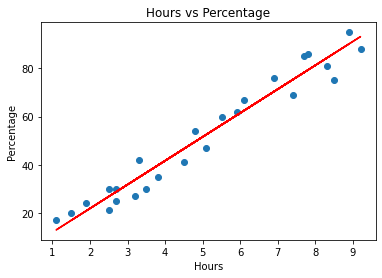

In [8]:
#Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

#Plotting for the test data
plt.scatter(x, y)
plt.title("Hours vs Percentage")
plt.xlabel("Hours")
plt.ylabel("Percentage")
plt.plot(x, line,color="red")
plt.show()

### Making Predictions 

Now that the training is done, it's time to predict some marks.

In [9]:
print(X_test) #Testing data - In hours
y_pred = regressor.predict(X_test) #Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [10]:
#Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Plotting the prediction with the actual values

Text(0, 0.5, 'Scores')

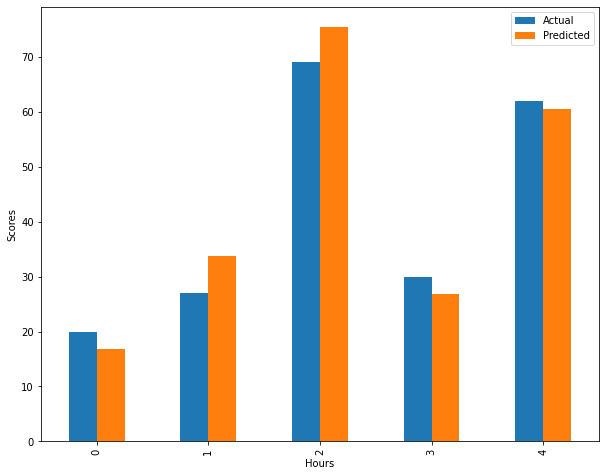

In [11]:
df.plot(kind='bar', figsize=(10,8))
plt.xlabel('Hours')
plt.ylabel('Scores')

### Prediction of scores according to the hours studied

In [12]:
hours = float(input("Enter number of hours studied "))
pred_own_score = regressor.predict([[hours]])
print('Predicted Score =',pred_own_score[0])

Enter number of hours studied 9.25
Predicted Score = 93.69173248737538


## Evaluating the model performance

### The final step is to evaluate the performance of algorithm.
Using method : Root mean squared 

In [13]:
from sklearn import metrics
print('Root mean squared error : ',np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

Root mean squared error :  4.6474476121003665
